Conditional Agent graph

In [8]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [9]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int

In [10]:
def adder(state: AgentState) -> AgentState:
    state['finalNumber'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    state['finalNumber'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """This function decides which operation to perform based on the operation field."""
    if state['operation'] == 'add':
        return "add_operation"
    elif state['operation'] == 'subtract':
        return "substract_operation"
    else:
        raise ValueError("Unknown operation")

In [12]:
stateGraph = StateGraph(AgentState)

stateGraph.add_node("add_node", adder)
stateGraph.add_node("substract_node", subtractor)
stateGraph.add_node("router", lambda state:state) # passthrough function

stateGraph.add_edge(START, "router")

stateGraph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        #Edge: Node
        "add_operation": "add_node",
        "substract_operation": "substract_node"        
    }
)

stateGraph.add_edge("add_node", END)
stateGraph.add_edge("substract_node", END)

app = stateGraph.compile()


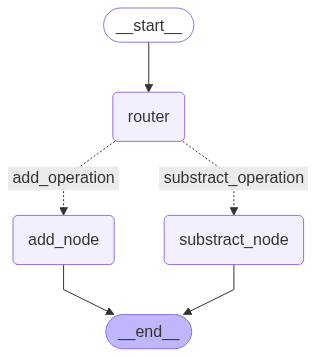

In [13]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
initial_state1 = AgentState(
    number1=10,
    operation='add',
    number2=5,
    #finalNumber=0
)
print(app.invoke(initial_state1))

{'number1': 10, 'operation': 'add', 'number2': 5, 'finalNumber': 15}


In [15]:
initial_state2 = AgentState(
    number1=10,
    operation='subtract',
    number2=5,
)
print(app.invoke(initial_state2))
# The output will show the finalNumber after performing the operation

{'number1': 10, 'operation': 'subtract', 'number2': 5, 'finalNumber': 5}


In [17]:
result = app.invoke({'number1': 10, 'operation': 'add', 'number2': 5})
print(result)

{'number1': 10, 'operation': 'add', 'number2': 5, 'finalNumber': 15}
